<a href="https://colab.research.google.com/github/sonisimran05/DataScience/blob/main/Mutual_Fund_Return_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Career Wednesday Project**

- The **mutual fund industry** refers to the **collective activities,

---

participants, and institutions** involved in **managing and operating mutual funds**. Mutual funds are investment vehicles that **pool money** from **multiple investors** and use it to invest in various financial instruments such as stocks, bonds, and money market instruments.

<center>
<img src="https://d28wu8o6itv89t.cloudfront.net/images/whatisamutualfundjpg-1507283243170.jpeg" width=450 height=450 alt="Mutual Funds">
</center>

- ML Algorithms can be applied to analyze the performance of mutual funds. This can be done to identify potential investment opportunities, to assess the risk and return of different funds, or to compare the performance of different funds over time
- For our use case, we will perform **binary classification** on **average 3 year returns** to assess if a customer achieves **low returns** or **high returns**

- The dataset can be utilized by anyone who is interested in analyzing the performance of mutual funds in India. Analysts can use this dataset to study **trends, compare different funds, and gain insights** into the **Indian mutual fund industry**.

- **Data Description**
    - **Scheme Name**: Name of the mutual fund scheme
    - **Min sip**: Min sip amount required to start
    - **Min lumpsum**: Min lumpsum amount required to start. A larger amount that is invested in one go
    - **Expense ratio**: calculated as a percentage of the Scheme's average Net Asset Value (NAV). Its basically the commission
    - **Fund size**: the total amount of money that a mutual fund manager must oversee and invest
    - **Fund age**: years since inception of scheme
    - **Fund manager**: A fund manager is responsible for implementing a fund's investment strategy and managing its trading activities. (Remove)
    - **Sortino**: Sortino ratio measures the risk-adjusted return of an investment asset, portfolio, or strategy
    - **Alpha**: Alpha is the excess returns relative to market benchmark for a given amount of risk taken by the scheme
    - **Standard deviation**: A standard deviation is a number that can be used to show how much the returns of a mutual fund scheme are likely to deviate from its average annual returns
    - **Beta**: Beta in a mutual fund is often used to convey the fund's volatility (gains or losses) in relation to its respective benchmark index
    - **Sharpe**: Sharpe Ratio of a mutual fund reveals its potential risk-adjusted returns
    - **Risk level**:
        1- Low risk
        2- Low to moderate
        3- Moderate
        4- Moderately High
        5- High
        6- Very High
    - **AMC name**: Mutual fund house managing the assets
    - **Rating**: 0-5 rating assigned to scheme
    - **Category**: The category to which the mutual fund belongs (e.g. equity, debt, hybrid)
    - **Sub-category**: It includes category like Small cap, Large cap, ELSS, etc.
    - **Return_1yr (%)**: The return percentage of the mutual fund scheme over 1 year
    - **Return_3yr (%)**: The return percentage of the mutual fund scheme over 3 year
    - **Return_5yr (%)**: The return percentage of the mutual fund scheme over 5year
   
**Disclaimer**: The dataset is for educational and research purposes only. The data may not be 100% accurate and users should verify the data before making any investment decisions.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df= pd.read_csv("https://gitlab.com/accredian/insaid-data/-/raw/main/PGP%20Job%20G%20Session%20Repo/2023/May'23/Project%20Data/processed_df.csv")

In [4]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,Unnamed: 17,returns_3yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,NaN,Low Return
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,NaN,Low Return
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,NaN,High Return
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,NaN,Low Return
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,NaN,High Return


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  Unnamed: 17    0 non-null      float64
 18  returns_3y

In [9]:
df.isna().sum()

,0
scheme_name,0
min_sip,0
min_lumpsum,0
expense_ratio,0
fund_size_cr,0
fund_age_yr,0
fund_manager,0
sortino,0
alpha,0
sd,0


In [10]:
df= df.drop('Unnamed: 17', axis=1)

In [12]:
df.shape

(814, 18)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   sortino        814 non-null    object 
 8   alpha          814 non-null    object 
 9   sd             814 non-null    object 
 10  beta           814 non-null    object 
 11  sharpe         814 non-null    object 
 12  risk_level     814 non-null    int64  
 13  amc_name       814 non-null    object 
 14  rating         814 non-null    int64  
 15  category       814 non-null    object 
 16  sub_category   814 non-null    object 
 17  returns_3yr    814 non-null    object 
dtypes: float64

# **Target** Variable

In [14]:
df['returns_3yr'].value_counts()

,count
returns_3yr,
Low Return,418
High Return,396


<Axes: xlabel='returns_3yr', ylabel='count'>

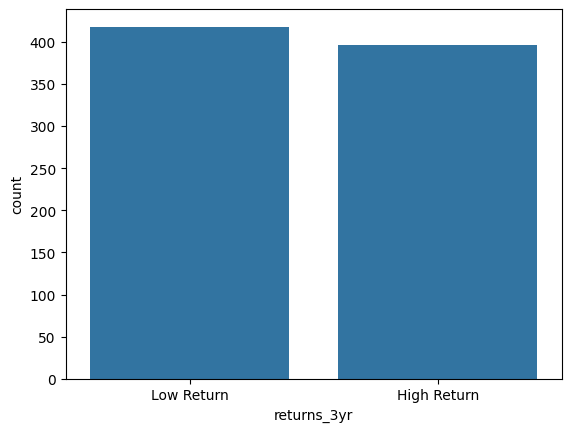

In [15]:
sns.countplot(x= df['returns_3yr'])

In [16]:
df['scheme_name'].value_counts()

,count
scheme_name,
SBI Long Term Advantage Fund,6
ICICI Pru Retirement Fund,4
Sundaram LT MC Tax Advantage Fund,3
AXIS Retirement Savings Fund,3
Tata Retirement Savings Fund,3
...,...
HSBC Flexi Debt Fund,1
HSBC Gilt Fund,1
HSBC Infrastructure Fund,1


## Encoding Categorical Variables
Since we have categorical columns such as scheme_name, fund_manager, amc_name, category, and sub_category, we need to encode these

In [26]:
# List of categorical columns to encode
categorical_cols = ['scheme_name', 'fund_manager', 'amc_name', 'category', 'sub_category', 'risk_level']

# Encoding categorical columns using one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [41]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_3yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,Low Return
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,Low Return
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,High Return
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,Low Return
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,High Return


In [43]:
# Set the feature columns (X) and target column (y)
X = data_encoded.drop(columns=['returns_3yr'])
y = data_encoded['returns_3yr']

# Train-test split (80-20) with random seed 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Replace '-' with NaN in the original DataFrame (df)
df.replace('-', np.nan, inplace=True)

# List of categorical columns to encode
categorical_cols = ['scheme_name', 'fund_manager', 'amc_name', 'category', 'sub_category', 'risk_level']

# Encoding categorical columns using one-hot encoding
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Set the feature columns (X) and target column (y)
X = data_encoded.drop(columns=['returns_3yr'])
y = data_encoded['returns_3yr']

# Train-test split (80-20) with random seed 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using SimpleImputer
# You can choose a different strategy if needed (e.g., 'most_frequent', 'median')
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace NaNs with the mean of each column
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Make predictions
y_pred = rf_model.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[77  5]
 [ 5 76]]
              precision    recall  f1-score   support

 High Return       0.94      0.94      0.94        82
  Low Return       0.94      0.94      0.94        81

    accuracy                           0.94       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.94      0.94      0.94       163



## Steps to Troubleshoot:


In [48]:
# Check unique values of the target column
print(y.unique())

# Example transformation if target values are strings
y = y.replace({'Low': 0, 'High': 1})

['Low Return' 'High Return']


In [49]:
#2. Re-check Accuracy Calculation
from sklearn.metrics import accuracy_score

# Calculate accuracy (make sure predictions and actual labels are correct)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.94


In [50]:
# Check predictions
print(y_pred[:10])  # First 10 predictions


['Low Return' 'Low Return' 'Low Return' 'High Return' 'Low Return'
 'High Return' 'High Return' 'High Return' 'High Return' 'High Return']


In [52]:
# Sanity check for splitting and sizes
print(X_train.shape, X_test.shape,
      y_train.shape, y_test.shape)


(651, 1142) (163, 1142) (651,) (163,)


In [53]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  5]
 [ 5 76]]
              precision    recall  f1-score   support

 High Return       0.94      0.94      0.94        82
  Low Return       0.94      0.94      0.94        81

    accuracy                           0.94       163
   macro avg       0.94      0.94      0.94       163
weighted avg       0.94      0.94      0.94       163

